In [9]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
uncertainties = pd.read_csv("uncertainties.csv", index_col=0)
levers = pd.read_csv("levers.csv", index_col=0)
outcomes = pd.read_csv("outcomes.csv", index_col=0)

In [68]:
df = pd.concat([levers, outcomes], axis=1)
df.head()

,campaign_bud_prop,final_target,target_met_frac,no_budget_frac,avg_fine_period,fine_per_house,time_conv,profit_std
0,0.322053,0.398082,0.0,0.0,160.8,309.122975,170.0,205.221724
1,0.322053,0.398082,0.3,0.0,168.0,180.903367,133.0,770.343948
2,0.322053,0.398082,0.0,0.0,157.2,28.889569,240.0,708.956417
3,0.322053,0.398082,0.1,0.0,168.0,71.448786,120.0,1104.731908
4,0.322053,0.398082,0.0,0.0,175.2,28.835754,200.0,949.748368


/home/yuvenious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/yuvenious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


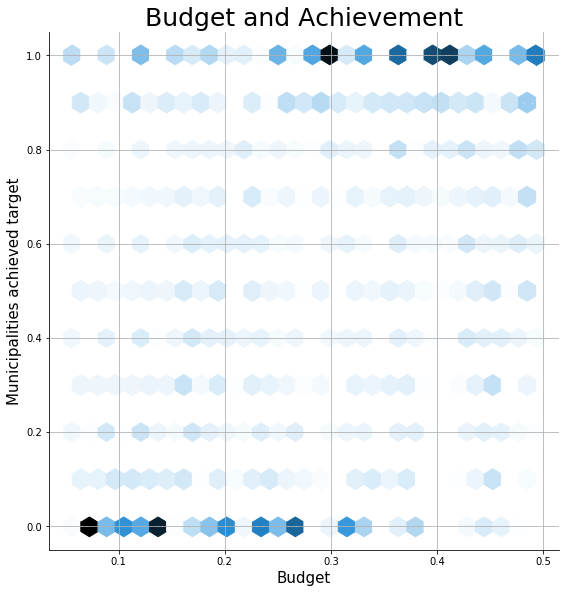

In [81]:
g = sns.jointplot("campaign_bud_prop", "target_met_frac", df, kind="hex")
g.plot_joint(plt.scatter, c="w", s=0.0001, marker="o")
g.ax_joint.legend_.remove()
g.ax_joint.grid()
g.ax_joint.set_xlabel("Budget", size=15)
g.ax_joint.set_ylabel("Municipalities achieved target", size=15)
g.ax_joint.set_title("Budget and Achievement", size=25)
g.ax_marg_x.remove()
g.ax_marg_y.remove()
g.fig.set_size_inches(10,10)

/home/yuvenious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/yuvenious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


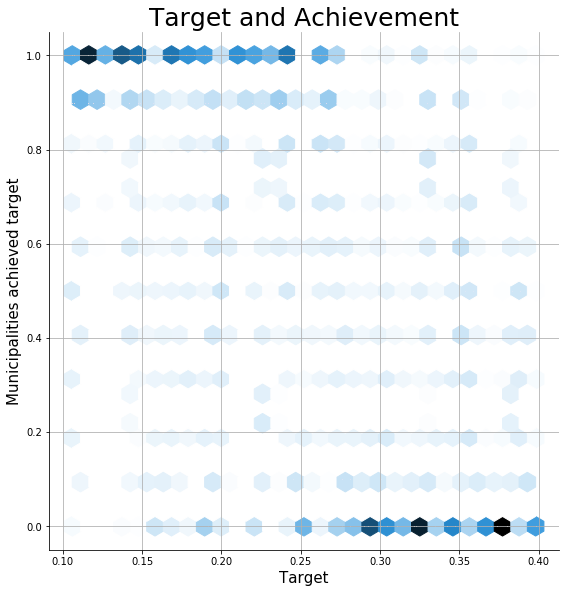

In [82]:
g = sns.jointplot("final_target", "target_met_frac", df, kind="hex")
g.plot_joint(plt.scatter, c="w", s=0.0001, marker="o")
g.ax_joint.legend_.remove()
g.ax_joint.grid()
g.ax_joint.set_xlabel("Target", size=15)
g.ax_joint.set_ylabel("Municipalities achieved target", size=15)
g.ax_joint.set_title("Target and Achievement", size=25)
g.ax_marg_x.remove()
g.ax_marg_y.remove()
g.fig.set_size_inches(10,10)

In [6]:
df = df.groupby(["campaign_bud_prop", "final_target"]).mean().reset_index()
df.head()

,campaign_bud_prop,final_target,target_met_frac,no_budget_frac,avg_fine_period,fine_per_house,time_conv,profit_std
0,0.056359,0.106822,0.6751,0.4150,167.6508,172.986797,202.600,462.435123
1,0.065335,0.379998,0.0030,0.5307,167.6112,160.697133,201.225,524.657398
2,0.069515,0.292276,0.0151,0.5173,167.9232,159.950322,201.001,525.669333
3,0.082260,0.157147,0.4322,0.4628,167.2596,166.604617,203.987,489.750654
4,0.088756,0.191476,0.2575,0.4902,168.2400,161.001858,200.296,511.988084


/home/yuvenious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/yuvenious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


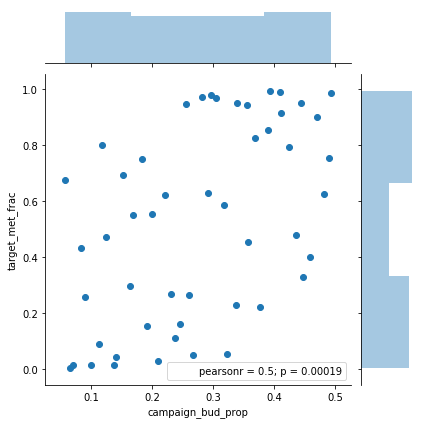

In [7]:
sns.jointplot("campaign_bud_prop", "target_met_frac", df)

In [114]:
import statsmodels.api as sm

X = df["campaign_bud_prop", "final_target"]
y = df["target_met_frac"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

ModuleNotFoundError: No module named 'statsmodels'